In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import seaborn as sns

In [2]:
df = pd.read_csv("../data library/Milho_v1.csv", sep=";")
df = df.sort_values(by="Data")
df = df.reset_index(drop=True)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima
0,2004-03-01,Milho,16.9936,17.5722,1,32025.0,32500.0,34200.0,30300.0
1,2004-04-01,Milho,19.8861,19.4868,1,29975.0,32125.0,32650.0,28175.0
2,2004-05-01,Milho,19.7989,20.2459,1,26250.0,30500.0,32250.0,26000.0
3,2004-06-01,Milho,17.9299,19.0091,1,22550.0,26250.0,26425.0,22500.0
4,2004-07-01,Milho,16.4940,17.7122,1,23775.0,22550.0,24525.0,22500.0


In [3]:
from bcb import PTAX
from bcb import currency

ptax = PTAX()

df_usd = currency.get(['USD'],
                  start='2004-03-01',
                  end='2024-09-01',
                  side='ask')

df_usd["Date"]=df_usd.index
df_usd["Month"] = df_usd["Date"].dt.month
df_usd["Year"] = df_usd["Date"].dt.year
df_usd["Day"] = 1
df_usd["Aux"] = df_usd["Year"].astype(str) +"-"+ df_usd["Month"].astype(str)
df_usd = df_usd.groupby("Aux").agg(
    USD = ("USD", "mean"),
    day = ("Day", "first"),
    month = ("Month", "first"),
    year = ("Year", "first"),
).reset_index(drop=True)

df_usd["Data"] = pd.to_datetime(df_usd[['year', 'month', 'day']])
df_usd = df_usd[["Data", "USD"]].sort_values(by="Data").reset_index(drop=True)

In [4]:
clima = pd.read_csv("../data library/Clima/MT_dados.csv", sep=';')
clima.rename(columns={"PRECIPITACAO TOTAL":"precipitacao", "TEMPERATURA MEDIA":"temperatura"}, inplace=True)

clima["precipitacao"] = clima.precipitacao.str.replace(',', '.')
clima["temperatura"] = clima.temperatura.str.replace(',', '.')

clima.bfill(inplace=True)
clima.head()

,Data Medicao,precipitacao,temperatura
0,31/03/2004,175.4,24.9
1,30/04/2004,175.4,24.5
2,31/05/2004,23,21.7
3,30/06/2004,18.8,22.1
4,31/07/2004,38,22.2


In [5]:
df["USD"] = df_usd["USD"]
df["Precipitacao"] = clima["precipitacao"].astype(float)
df["Temperatura"] = clima["temperatura"].astype(float)
df['lag_Estadual'] = df['Estadual'].shift(1)
df.head()

,Data,Cultivo,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual
0,2004-03-01,Milho,16.9936,17.5722,1,32025.0,32500.0,34200.0,30300.0,2.905457,175.4,24.9,NaN
1,2004-04-01,Milho,19.8861,19.4868,1,29975.0,32125.0,32650.0,28175.0,2.905985,175.4,24.5,16.9936
2,2004-05-01,Milho,19.7989,20.2459,1,26250.0,30500.0,32250.0,26000.0,3.100419,23.0,21.7,19.8861
3,2004-06-01,Milho,17.9299,19.0091,1,22550.0,26250.0,26425.0,22500.0,3.129148,18.8,22.1,19.7989
4,2004-07-01,Milho,16.4940,17.7122,1,23775.0,22550.0,24525.0,22500.0,3.036777,38.0,22.2,17.9299


In [6]:
df_omc = pd.read_csv("../data library/indice_omc.csv", sep=',')
df_omc = df_omc[:-3]
df_omc.rename(columns={"Index":"OMC"}, inplace=True)
df_1 = df.merge(df_omc, how="right")
df = df_1.copy()

EDA

In [7]:
df.describe()

,Estadual,País,Id,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual,OMC
count,225.000000,225.000000,225.0,225.000000,225.000000,225.000000,225.000000,225.000000,218.000000,222.000000,225.000000,225.000000
mean,32.743644,34.479534,1.0,46796.720000,46705.413333,49711.386667,43765.311111,3.191376,95.757798,24.618018,32.567752,6.453333
std,21.061069,20.574290,0.0,14170.282264,14263.197609,15279.569360,12864.733438,1.347770,108.385018,1.166594,21.066990,17.572523
min,10.865400,12.568400,1.0,22900.000000,22450.000000,23175.000000,21350.000000,1.563938,0.000000,21.400000,10.865400,-36.000000
25%,19.046300,20.784000,1.0,36325.000000,36275.000000,38275.000000,34825.000000,2.028079,12.050000,24.000000,19.038500,-7.000000
50%,23.505400,25.214100,1.0,40675.000000,40425.000000,43600.000000,37825.000000,3.061715,42.600000,24.400000,23.460800,6.000000
75%,39.733300,41.997900,1.0,58500.000000,58200.000000,63425.000000,53675.000000,4.149464,141.400000,25.400000,39.541000,19.000000
max,93.681500,89.656200,1.0,81825.000000,81150.000000,84375.000000,77675.000000,5.651391,492.200000,27.800000,93.681500,53.000000


In [8]:
df[["Estadual", "País", "Último", "Abertura", "Máxima", "Mínima", "USD", "Precipitacao", "Temperatura", "lag_Estadual", "OMC"]].corr()

,Estadual,País,Último,Abertura,Máxima,Mínima,USD,Precipitacao,Temperatura,lag_Estadual,OMC
Estadual,1.000000,0.997536,0.414060,0.407199,0.409822,0.428816,0.855311,-0.176031,0.254230,0.990724,0.129961
País,0.997536,1.000000,0.407479,0.401173,0.402470,0.423311,0.862196,-0.180494,0.256179,0.991041,0.118703
Último,0.414060,0.407479,1.000000,0.948675,0.971339,0.980163,0.027797,-0.097092,-0.144515,0.425165,0.397197
Abertura,0.407199,0.401173,0.948675,1.000000,0.982206,0.974085,0.025908,-0.113951,-0.130743,0.421496,0.383844
Máxima,0.409822,0.402470,0.971339,0.982206,1.000000,0.969224,0.020446,-0.138816,-0.154763,0.422340,0.408583
Mínima,0.428816,0.423311,0.980163,0.974085,0.969224,1.000000,0.054593,-0.075413,-0.132418,0.440311,0.365519
USD,0.855311,0.862196,0.027797,0.025908,0.020446,0.054593,1.000000,-0.147115,0.323848,0.846632,-0.174005
Precipitacao,-0.176031,-0.180494,-0.097092,-0.113951,-0.138816,-0.075413,-0.147115,1.000000,0.017772,-0.170142,0.092395
Temperatura,0.254230,0.256179,-0.144515,-0.130743,-0.154763,-0.132418,0.323848,0.017772,1.000000,0.241124,-0.064277
lag_Estadual,0.990724,0.991041,0.425165,0.421496,0.422340,0.440311,0.846632,-0.170142,0.241124,1.000000,0.140741


Text(0.5, 1.0, 'Correlation Heatmap')

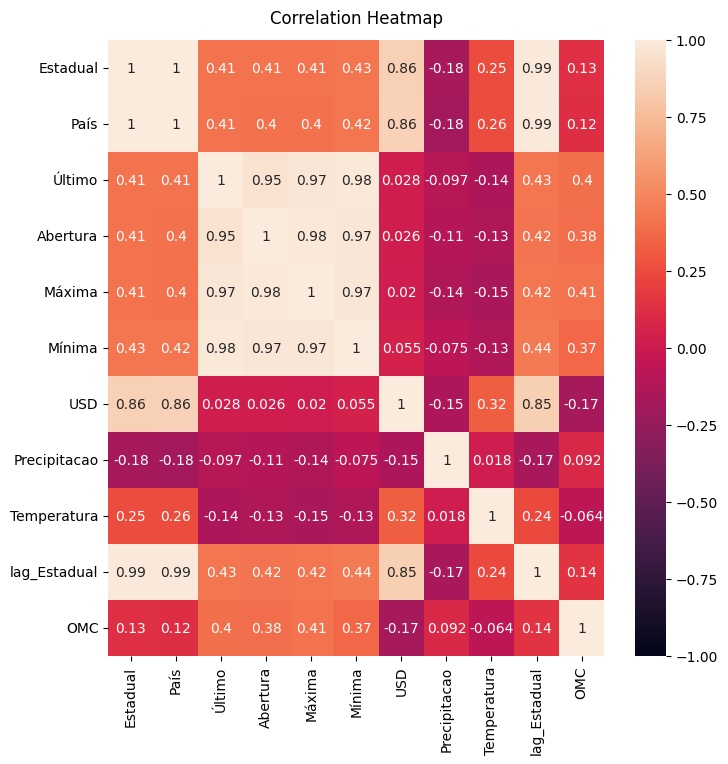

In [9]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(df[["Estadual", "País", "Último", "Abertura", "Máxima", "Mínima", "USD", "Precipitacao", "Temperatura", "lag_Estadual","OMC"]].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

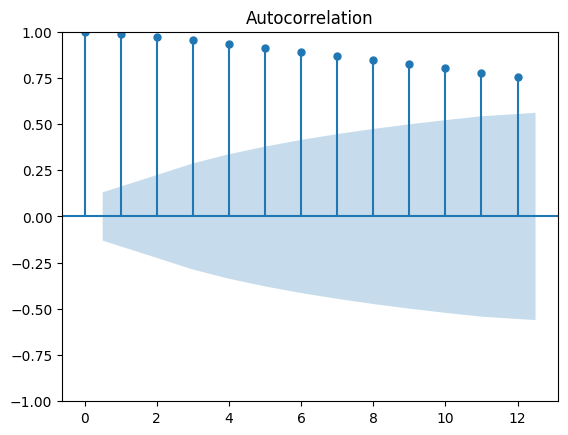

<Figure size 3000x1000 with 0 Axes>

In [10]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df.Estadual, lags=12)
plt.figure(figsize=(30,10))
plt.show()

In [11]:
train_size = 0.8
test_size = 0.2

train_start = df.Data[0]
train_end = df.Data[int(len(df)*0.8)]

test_start = df.Data[int(len(df)*0.8)]
test_end = df.Data[len(df)-1]

print(train_start)
print(train_end)
print(test_start)
print(test_end)


2006-01-01
2021-01-01
2021-01-01
2024-09-01


Linear Regression

In [12]:
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [13]:
df1 = df.copy()

df1['Data'] = pd.to_datetime(df1['Data'])
df1["Time"] = df.index

train_df = df1[:(int(len(df1)*0.8))].copy()
test_df = df1[(int(len(df1)*0.8)+1):].copy()

In [14]:
X = df1.loc[:, ['Time']]  # features
y = df1.loc[:, 'Estadual']  # target

AutoRegressive

In [15]:
df1 = df.copy()

df1['Data'] = pd.to_datetime(df1['Data'])
df1.set_index('Data', inplace = True)
df1.dropna(inplace=True)
df1 = df1.asfreq('ME', method = 'bfill') 
df1 = df1[["Estadual", "País"]]

train_df = df1[:(int(len(df1)*0.8))].copy()
test_df = df1[(int(len(df1)*0.8)):].copy()

display(df1)

,Estadual,País
Data,,
2006-01-31,13.2029,14.7255
2006-02-28,11.3700,13.5052
2006-03-31,10.8654,12.5684
2006-04-30,12.2447,13.4234
2006-05-31,13.1832,14.5282
...,...,...
2023-09-30,45.0628,48.1146
2023-10-31,45.9451,50.2974
2023-11-30,50.4828,56.4685


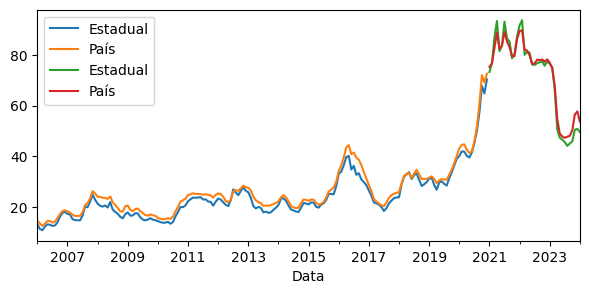

In [16]:
fig, ax = plt.subplots(figsize=(7, 3))
df1.loc[train_start:train_end].plot(ax=ax, label = "Train")
df1.loc[test_start:test_end].plot(ax=ax, label = "Test")
ax.legend()

MAE: 36.1537913156627
RMSE: 39.865774555768056
MAPE: 0.485498739357759
R-Squared: -5.040352800168731


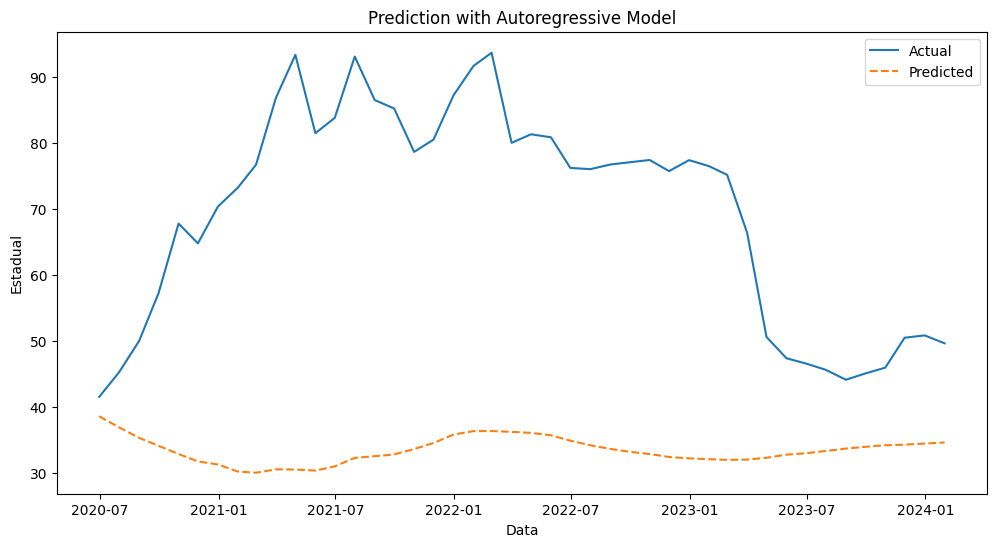

In [17]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import r2_score


# split dataset
X = df1[["Estadual"]].values
train = train_df["Estadual"]
test = test_df["Estadual"]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
# print('Coefficients: %s' % model_fit.params)

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
# for i in range(len(predictions)):
#     print('predicted=%f, expected=%f' % (predictions[i], test[i]))

test_df["Data"] = test_df.index

print(f"MAE: {mean_absolute_error(test, predictions)}")
print(f"RMSE: {root_mean_squared_error(test, predictions)}")
print(f"MAPE: {mean_absolute_percentage_error(test, predictions)}")
print(f"R-Squared: {r2_score(test, predictions)}")

plt.figure(figsize=(12, 6))
plt.plot(test_df["Data"], test, label='Actual')
plt.plot(test_df["Data"], predictions, label='Predicted', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Estadual')
plt.legend()
plt.title('Prediction with Autoregressive Model')
plt.show()

In [18]:
from bcb import PTAX
from bcb import currency

ptax = PTAX()

df_usd = currency.get(['USD'],
                  start='2004-03-01',
                  end='2024-09-01',
                  side='ask')

df_usd["Date"]=df_usd.index
df_usd["Month"] = df_usd["Date"].dt.month
df_usd["Year"] = df_usd["Date"].dt.year
df_usd["Day"] = 1
df_usd["Aux"] = df_usd["Year"].astype(str) +"-"+ df_usd["Month"].astype(str)
df_usd = df_usd.groupby("Aux").agg(
    USD = ("USD", "mean"),
    day = ("Day", "first"),
    month = ("Month", "first"),
    year = ("Year", "first"),
).reset_index(drop=True)

df_usd["Data"] = pd.to_datetime(df_usd[['year', 'month', 'day']])
df_usd = df_usd[["Data", "USD"]].sort_values(by="Data").reset_index(drop=True)

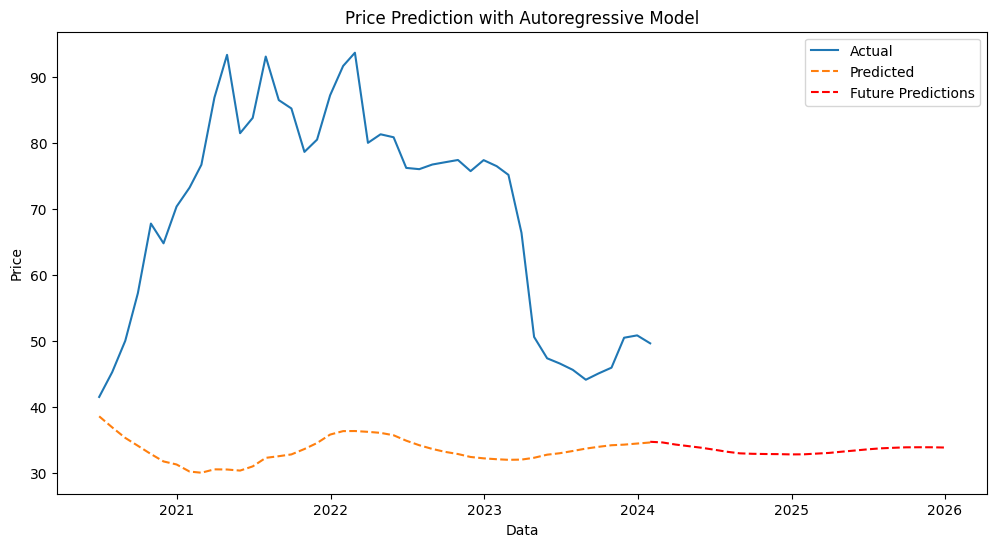

In [19]:
# Define the number of future time steps you want to predict (1 week)
forecast_steps = 24
 
# Extend the predictions into the future for one year
future_indices = range(len(test_df), len(test_df) + forecast_steps)
future_predictions = model_fit.predict(start=len(train_df), end=len(train_df) + len(test_df) + forecast_steps - 1, dynamic=False)

# Create date indices for the future predictions
future_dates = pd.date_range(start=test_df['Data'].iloc[-1], periods=forecast_steps, freq='ME')
 
# Plot the actual data, existing predictions, and one year of future predictions
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual')
plt.plot(predictions, label='Predicted', linestyle='--')
plt.plot(future_dates, future_predictions[-forecast_steps:], label='Future Predictions', linestyle='--', color='red')
plt.xlabel('Data')
plt.ylabel('Price')
plt.legend()
plt.title('Price Prediction with Autoregressive Model')
plt.show()

In [20]:
future_predictions[-forecast_steps:]

2024-02-29    34.710200
2024-03-31    34.610850
2024-04-30    34.293410
2024-05-31    34.058065
2024-06-30    33.811801
2024-07-31    33.523609
2024-08-31    33.204953
2024-09-30    32.958123
2024-10-31    32.888990
2024-11-30    32.855779
2024-12-31    32.840676
2025-01-31    32.797165
2025-02-28    32.812081
2025-03-31    32.914634
2025-04-30    33.021367
2025-05-31    33.205983
2025-06-30    33.383072
2025-07-31    33.559412
2025-08-31    33.712207
2025-09-30    33.798821
2025-10-31    33.871149
2025-11-30    33.882105
2025-12-31    33.877987
2026-01-31    33.839056
Freq: ME, dtype: float64

ARMA & ARIMA

In [21]:
#Import libraries 
import inspect
import time
import warnings
import plotly.express as px
import seaborn as sns

from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

warnings.filterwarnings("ignore")

In [22]:
df2 = df.copy()

df2['Data'] = pd.to_datetime(df2['Data'])
#df2.set_index('Data', inplace = True)
#df2.dropna(inplace=True)
#df2 = df2.asfreq('ME', method = 'bfill') 
df2 = df2[["Data","Estadual"]]


df2["Month"] = df2["Data"].dt.month
df2["Quarter"] = df2["Data"].dt.quarter
df2["Year"] = df2["Data"].dt.year

train_df = df2[:(int(len(df2)*0.8))].copy()
test_df = df2[(int(len(df2)*0.8)):].copy()

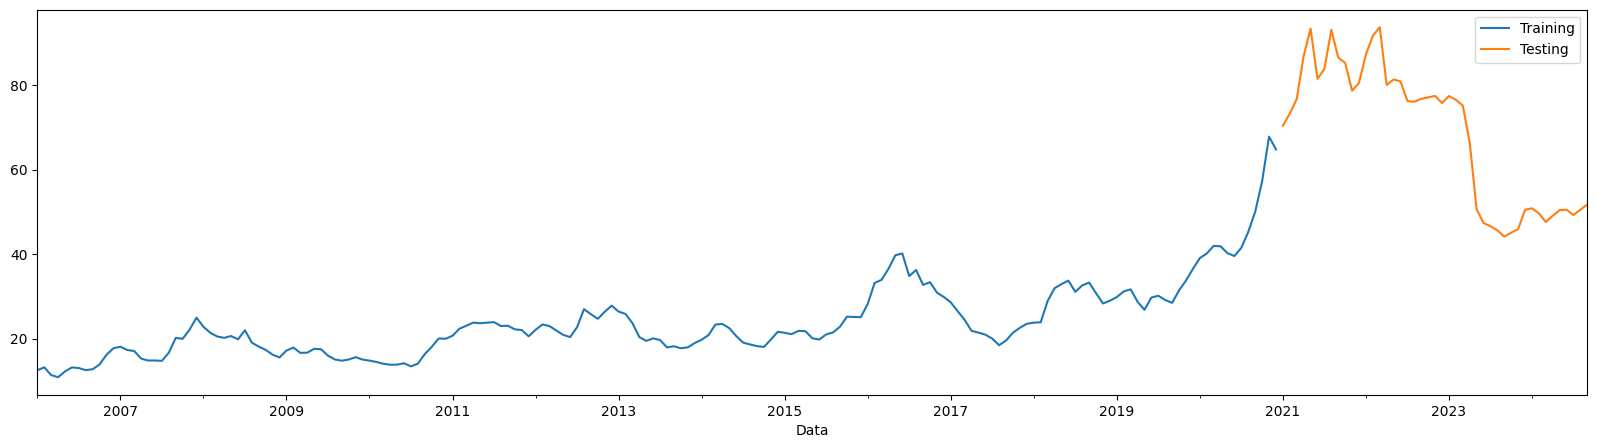

In [23]:
figure, ax = plt.subplots(figsize=(20, 5))
train_df.plot(ax=ax, label="Training", x="Data", y="Estadual")
test_df.plot(ax=ax, label="Testing", x="Data", y="Estadual")
plt.show()

In [24]:
from statsmodels.tsa.stattools import adfuller

adf_test = adfuller(df2['Estadual'])
# Output the results
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.368216
p-value: 0.597416


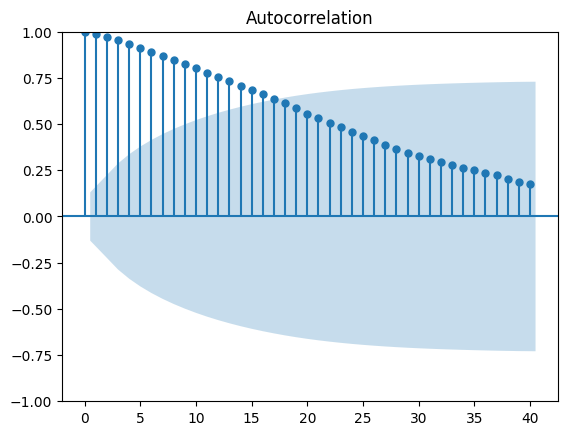

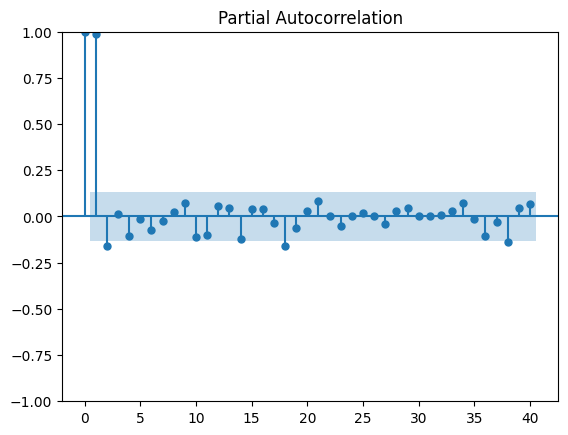

In [25]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df2['Estadual'], lags=40)
plot_pacf(df2['Estadual'], lags=40)
plt.show()

In [26]:
training_data = train_df.copy()
testing_data = test_df.copy()

In [27]:
training_data = training_data.drop(columns=["Data"])
testing_dates = testing_data["Data"]
testing_data = testing_data.drop(columns=["Data"])

X_train = training_data[["Month", "Quarter", "Year"]]
y_train = training_data["Estadual"]

X_test = testing_data[["Month", "Quarter", "Year"]]
y_test = testing_data["Estadual"]

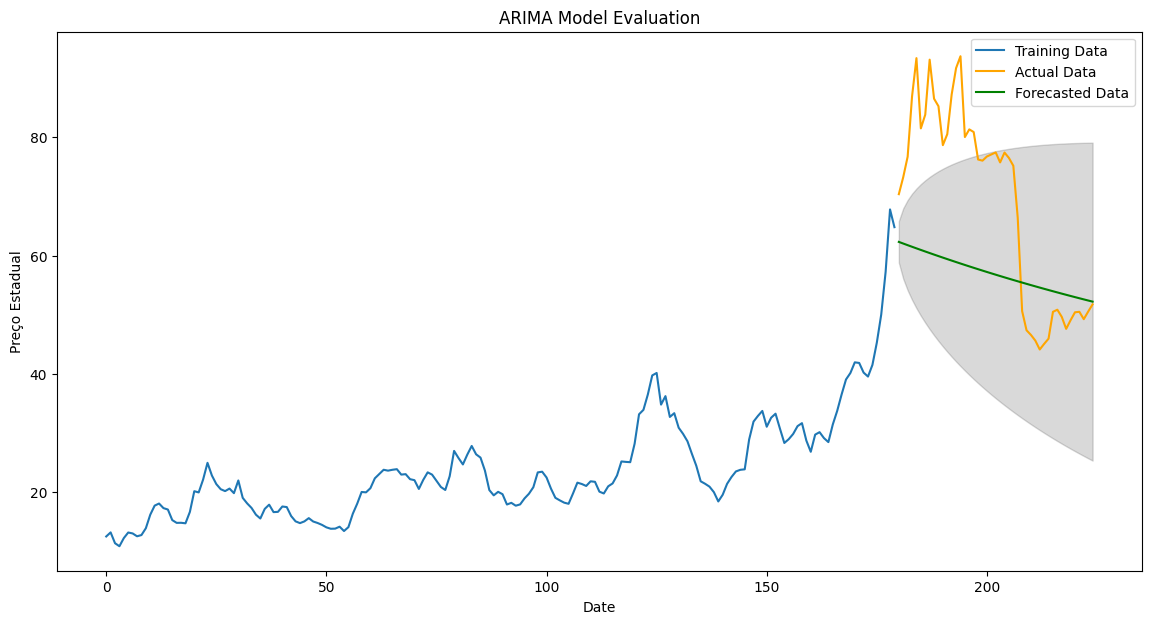

RMSE: 18.32854551062688


In [28]:
from sklearn.metrics import mean_squared_error

# Split the data into train and test
train_size = int(len(df2) * 0.8)
train, test = df2[0:train_size], df2[train_size:len(df2)]

# Fit the ARIMA model on the training dataset
model_train = ARIMA(train['Estadual'], order=(1, 0, 1))
model_train_fit = model_train.fit()

# Forecast on the test dataset
test_forecast = model_train_fit.get_forecast(steps=len(test))
test_forecast_series = pd.Series(test_forecast.predicted_mean, index=test.index)

# Calculate the mean squared error
mse = mean_squared_error(test['Estadual'], test_forecast_series)
rmse = mse**0.5

plt.figure(figsize=(14,7))
plt.plot(train['Estadual'], label='Training Data')
plt.plot(test['Estadual'], label='Actual Data', color='orange')
plt.plot(test_forecast_series, label='Forecasted Data', color='green')
plt.fill_between(test.index, 
                 test_forecast.conf_int().iloc[:, 0], 
                 test_forecast.conf_int().iloc[:, 1], 
                 color='k', alpha=.15)
plt.title('ARIMA Model Evaluation')
plt.xlabel('Date')
plt.ylabel('Preço Estadual')
plt.legend()
plt.show()

print('RMSE:', rmse)

In [29]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error
from sklearn.metrics import r2_score

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"RMSE: {root_mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")
  print(f"R-Squared: {r2_score(y_test, prediction)}")


In [30]:
evaluate_model(test['Estadual'], test_forecast_series)

MAE: 15.570730004546654
RMSE: 18.32854551062688
MAPE: 0.2076303685274245
R-Squared: -0.2270281369892715


XGBoost

In [31]:
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV

# XGBoost
cv_split = TimeSeriesSplit(n_splits=2, test_size=len(X_test))
model = XGBRegressor()
parameters = {
    "max_depth": [3, 4, 6, 5, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2, 0.3],
    "n_estimators": [100, 300, 500, 700, 900, 1000],
    "colsample_bytree": [0.3, 0.5, 0.7]
}


grid_search = GridSearchCV(estimator=model, cv=cv_split, param_grid=parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=2, test_size=45),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, impor...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
                         'max_depth': [3, 4, 6, 5, 10],
                         'n_estimators': [100, 300, 500, 700, 900, 1000]})

In [32]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error

def evaluate_model(y_test, prediction):
  print(f"MAE: {mean_absolute_error(y_test, prediction)}")
  print(f"RMSE: {root_mean_squared_error(y_test, prediction)}")
  print(f"MAPE: {mean_absolute_percentage_error(y_test, prediction)}")

def plot_predictions(testing_dates, y_test, prediction):
  df_test = pd.DataFrame({"date": testing_dates, "actual": y_test, "prediction": prediction })
  _, ax = plt.subplots(figsize=(10, 5))
  df_test.plot(ax=ax, label="Actual", x="date", y="actual")
  df_test.plot(ax=ax, label="Prediction", x="date", y="prediction")
  plt.legend(["Actual", "Prediction"])
  plt.show()

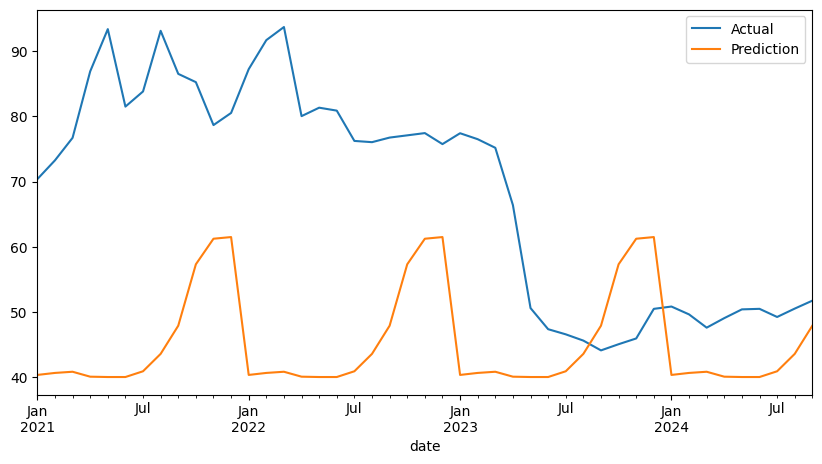

MAE: 25.143827084147137
RMSE: 29.69542160727949
MAPE: 0.3347658604803994


In [33]:

# Evaluating GridSearch results
prediction = grid_search.predict(X_test)
plot_predictions(testing_dates, y_test, prediction)
evaluate_model(y_test, prediction)